In [143]:
%matplotlib inline 
import pandas as pd
import random
import seaborn as sns
import numpy as np

# Series

Pandas Series can be created by passing any sequence to (in this case list):

In [144]:
x = pd.Series(['a','b','c'])

By default, an **index** from 0 to n-1 is created (left):

In [145]:
x

0    a
1    b
2    c
dtype: object

Each element in the Series can be accessed by its index:

In [146]:
x[1]

'b'

You can also specify an index:

In [147]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

In [148]:
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [149]:
s['d']

4

Boolean expressions return a **mask**, where the expression is evaluated for each item:

In [150]:
q = s > 3

You can use such masks to extract parts from your series (where the mask is True):

In [151]:
s[q]

d    4
e    5
dtype: int64

In [152]:
s[s % 2 == 0]

b    2
d    4
dtype: int64

The primes example from the slides:

In [153]:
primes = pd.Series([n for n in range(2,101) if not any([n % x == 0 for x in range(2, n)])])

In [154]:
primes

0      2
1      3
2      5
3      7
4     11
5     13
6     17
7     19
8     23
9     29
10    31
11    37
12    41
13    43
14    47
15    53
16    59
17    61
18    67
19    71
20    73
21    79
22    83
23    89
24    97
dtype: int64

You can **change the index** at any time:

In [155]:
primes.index = range(1,len(primes) +1)

In [156]:
primes

1      2
2      3
3      5
4      7
5     11
6     13
7     17
8     19
9     23
10    29
11    31
12    37
13    41
14    43
15    47
16    53
17    59
18    61
19    67
20    71
21    73
22    79
23    83
24    89
25    97
dtype: int64

In [157]:
primes[13]

41

You can **iterate** over a Series:

In [158]:
for p in primes:
    print(str(p) + " is a prime")

2 is a prime
3 is a prime
5 is a prime
7 is a prime
11 is a prime
13 is a prime
17 is a prime
19 is a prime
23 is a prime
29 is a prime
31 is a prime
37 is a prime
41 is a prime
43 is a prime
47 is a prime
53 is a prime
59 is a prime
61 is a prime
67 is a prime
71 is a prime
73 is a prime
79 is a prime
83 is a prime
89 is a prime
97 is a prime


Or use the **map** method to run a function on each of its elements.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html#pandas.Series.map

In [159]:
primes.map(lambda o: o**2)

1        4
2        9
3       25
4       49
5      121
6      169
7      289
8      361
9      529
10     841
11     961
12    1369
13    1681
14    1849
15    2209
16    2809
17    3481
18    3721
19    4489
20    5041
21    5329
22    6241
23    6889
24    7921
25    9409
dtype: int64

There are a lot of useful methods that you can run on a Series object, see https://pandas.pydata.org/pandas-docs/stable/reference/series.html#series

In [160]:
primes.describe()

count    25.000000
mean     42.400000
std      29.475979
min       2.000000
25%      17.000000
50%      41.000000
75%      67.000000
max      97.000000
dtype: float64

A special kind of index is the **time series index**. 

More on time series in Pandas:
* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
* https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [161]:
primes.index = pd.date_range('2019', '2045', 25)

In [162]:
primes

2019-01-01 00:00:00     2
2020-01-31 17:00:00     3
2021-03-02 10:00:00     5
2022-04-02 03:00:00     7
2023-05-02 20:00:00    11
2024-06-01 13:00:00    13
2025-07-02 06:00:00    17
2026-08-01 23:00:00    19
2027-09-01 16:00:00    23
2028-10-01 09:00:00    29
2029-11-01 02:00:00    31
2030-12-01 19:00:00    37
2032-01-01 12:00:00    41
2033-01-31 05:00:00    43
2034-03-02 22:00:00    47
2035-04-02 15:00:00    53
2036-05-02 08:00:00    59
2037-06-02 01:00:00    61
2038-07-02 18:00:00    67
2039-08-02 11:00:00    71
2040-09-01 04:00:00    73
2041-10-01 21:00:00    79
2042-11-01 14:00:00    83
2043-12-02 07:00:00    89
2045-01-01 00:00:00    97
dtype: int64

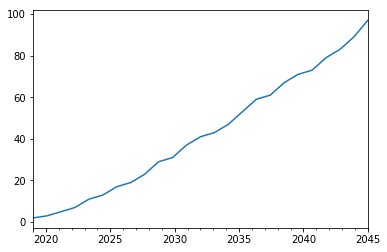

In [163]:
primes.plot()

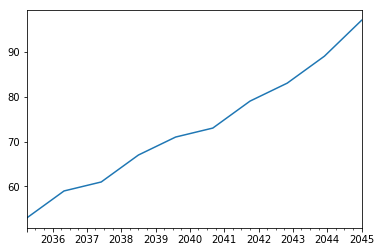

In [164]:
primes[primes > 50].plot()

In [165]:
rand = pd.Series(random.sample(range(1, 100), 25), index=primes.index)

In [166]:
rand

2019-01-01 00:00:00    66
2020-01-31 17:00:00    24
2021-03-02 10:00:00    36
2022-04-02 03:00:00    32
2023-05-02 20:00:00    55
2024-06-01 13:00:00    49
2025-07-02 06:00:00    11
2026-08-01 23:00:00    95
2027-09-01 16:00:00     2
2028-10-01 09:00:00    31
2029-11-01 02:00:00    74
2030-12-01 19:00:00    43
2032-01-01 12:00:00    85
2033-01-31 05:00:00    72
2034-03-02 22:00:00    73
2035-04-02 15:00:00    59
2036-05-02 08:00:00    14
2037-06-02 01:00:00    81
2038-07-02 18:00:00    64
2039-08-02 11:00:00    21
2040-09-01 04:00:00    10
2041-10-01 21:00:00    92
2042-11-01 14:00:00    15
2043-12-02 07:00:00    70
2045-01-01 00:00:00    47
dtype: int64

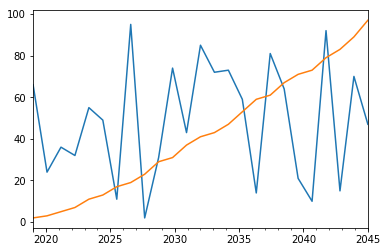

In [167]:
rand.plot()
primes.plot()

In [168]:
primes.autocorr()

0.9984217901220291

In [169]:
rand.autocorr()

-0.34457100676421953

There are methods that have two or more Series as parameters:

In [170]:
primes.corr(rand)

0.08155189664657236

## Exercise

Generate a random Series (length 25, number below 100) that has a mean value +-1 as the prime number below 100

In [171]:
primes.mean()

42.4

In [172]:
random_series = pd.Series(random.sample(range(1, 100), 25), index=primes.index)
mean = random_series.mean()
while mean < primes.mean() + 1 and mean > primes.mean() - 1:
    random_series = pd.Series(random.sample(range(1, 100), 25), index=primes.index)
    mean = random_series.mean()

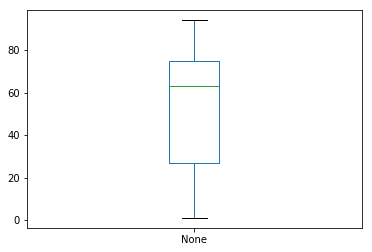

In [173]:
random_series.plot(kind='box')

In [174]:
print(random_series)

2019-01-01 00:00:00    64
2020-01-31 17:00:00    63
2021-03-02 10:00:00    27
2022-04-02 03:00:00    94
2023-05-02 20:00:00    86
2024-06-01 13:00:00     6
2025-07-02 06:00:00    14
2026-08-01 23:00:00    76
2027-09-01 16:00:00    83
2028-10-01 09:00:00     9
2029-11-01 02:00:00    60
2030-12-01 19:00:00    88
2032-01-01 12:00:00    55
2033-01-31 05:00:00     1
2034-03-02 22:00:00    47
2035-04-02 15:00:00    69
2036-05-02 08:00:00    75
2037-06-02 01:00:00    87
2038-07-02 18:00:00    72
2039-08-02 11:00:00    16
2040-09-01 04:00:00    65
2041-10-01 21:00:00    62
2042-11-01 14:00:00    71
2043-12-02 07:00:00     3
2045-01-01 00:00:00    61
dtype: int64


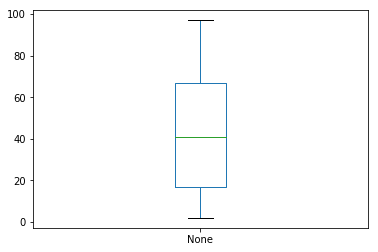

In [175]:
primes.plot(kind='box')

In [176]:
rand_df = pd.DataFrame(
    {
        'primes': primes,
        'random': random_series,
        'random2': pd.Series(random.sample(range(1, 100), 25), index=primes.index)
    }
)

In [177]:
rand_df

,primes,random,random2
2019-01-01 00:00:00,2,64,64
2020-01-31 17:00:00,3,63,78
2021-03-02 10:00:00,5,27,15
2022-04-02 03:00:00,7,94,90
2023-05-02 20:00:00,11,86,92
2024-06-01 13:00:00,13,6,53
2025-07-02 06:00:00,17,14,84
2026-08-01 23:00:00,19,76,1
2027-09-01 16:00:00,23,83,27
2028-10-01 09:00:00,29,9,55


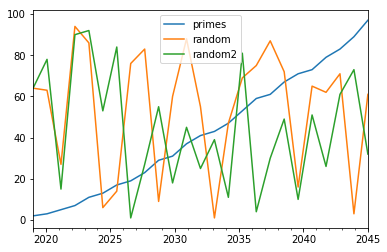

In [178]:
rand_df.plot()

Generate a random Series that is correlated (>= 0.5) to the prime numbers below 100

In [179]:
random_series = pd.Series(random.sample(range(1, 100), 25), index=primes.index)
correlation = primes.corr(random_series)
while correlation < 0.6:
    random_series = pd.Series(random.sample(range(1, 100), 25), index=primes.index)
    correlation = primes.corr(random_series)

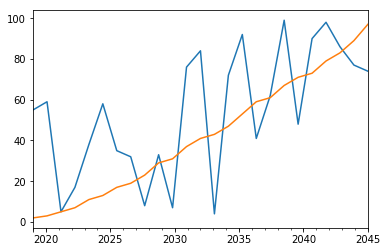

In [180]:
random_series.plot()
primes.plot()

# DataFrame

A DataFrame is a collection of Series with the same index / **a table** with rows and columns.

## Creation

You can create a DataFrame in various ways:
* by passing a list of elements
* by passing a map, of column names mapped to column values
* by passing a list of Series
* by loading from a file with tabular data (csv, Excel, etc.)

In [181]:
# using a list of elements:

pd.DataFrame([
    ["DIN EN ISO", 14001, "environment"],
    ["DIN EN ISO", 9001, "quality"],
    ["DIN ISO/IEC", 27001, "IT-security"]
])

,0,1,2
0,DIN EN ISO,14001,environment
1,DIN EN ISO,9001,quality
2,DIN ISO/IEC,27001,IT-security


In [182]:
# using a map of columns:

pd.DataFrame({
    "prefix": ["DIN EN ISO", "DIN EN ISO", "DIN ISO/IEC"],
    "number": [14001, 9001, 27001],
    "keyword": ["environment", "quality", "IT-security"]
})

,prefix,number,keyword
0,DIN EN ISO,14001,environment
1,DIN EN ISO,9001,quality
2,DIN ISO/IEC,27001,IT-security


In [183]:
# loading an Excel file:

# example: 
# 
# BMBF - Gesamte Innovationsausgaben nach Branchengruppen und Beschäftigtengrößenklassen
# (Mannheim Innovation Panel)
# https://www.govdata.de/web/guest/suchen/-/details/gesamte-innovationsausgaben-nach-branchengruppen-und-beschaftigtengrossenklassen

inno = pd.read_excel("./data/innovationsausgaben.xls")

In [184]:
inno

,Nummer,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,B 05-09,Bergbau und Gewinnung von Steinen und Erden,0.3,0.5,0.4,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.2
1,C 10-12,Herstellung von Nahrungs- und Futtermitteln so...,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3
2,C 13-15,"Textil-, Bekleidungs- und Ledergewerbe",0.6,0.8,0.8,0.5,0.7,0.7,0.9,0.9,0.7,0.9,0.9,1.0,1.0,1.0
3,C 16-18,"Holz- (ohne Herstellung von Möbeln), Papier- u...",2.0,2.1,1.7,1.2,1.4,1.3,1.4,1.3,1.4,1.6,1.5,1.2,1.5,1.3
4,C 19,Kokerei und Mineralölverarbeitung,0.5,0.3,0.3,0.3,0.3,0.3,0.4,0.3,0.4,0.5,0.5,0.3,0.3,0.3
5,C 20,Herstellung von chemischen Erzeugnissen,6.0,6.0,6.2,5.9,5.9,6.3,6.8,6.8,6.7,7.2,7.1,8.0,7.8,7.7
6,C 21,Herstellung von pharmazeutischen Erzeugnissen,5.7,5.8,6.5,6.2,6.1,6.8,7.4,8.2,8.5,8.8,9.1,11.0,11.8,12.3
7,C 22,Herstellung von Gummi- und Kunststoffwaren,1.8,1.8,1.9,1.6,1.8,2.1,2.1,2.0,2.3,2.3,2.5,2.9,2.8,2.6
8,C 23,"Herstellung von Glas und Glaswaren, Keramik, V...",1.0,1.2,1.3,0.9,1.1,1.1,1.2,1.0,1.4,1.0,0.9,1.4,1.4,1.4
9,C 24,Metallerzeugung und -bearbeitung,1.9,2.2,2.6,1.7,1.6,1.9,1.9,2.0,2.0,1.9,2.1,2.1,1.9,2.0


In [185]:
# loading an CSV file:

# example: 
# 
# International Energy Statistics
# Global energy trade & production 1990-2014 
# https://www.kaggle.com/unitednations/international-energy-statistics/

energy = pd.read_csv("./data/all_energy_statistics.csv")

In [186]:
energy.shape

(1189482, 7)

In [187]:
energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


## Exploring a dataset

What are we dealing with?

In [188]:
inno.shape

(30, 16)

In [189]:
inno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
Nummer                   30 non-null object
Wirtschaftsgliederung    30 non-null object
2006                     30 non-null float64
2007                     30 non-null float64
2008                     30 non-null float64
2009                     30 non-null float64
2010                     30 non-null float64
2011                     30 non-null float64
2012                     30 non-null float64
2013                     30 non-null float64
2014                     30 non-null float64
2015                     30 non-null float64
2016                     30 non-null float64
2017                     30 non-null float64
2018                     30 non-null float64
2019                     30 non-null float64
dtypes: float64(14), object(2)
memory usage: 3.8+ KB


Show the first (**head**) or last (**tail**) n rows of a dataset (useful for very large datasets)

In [190]:
inno.head(3)

,Nummer,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,B 05-09,Bergbau und Gewinnung von Steinen und Erden,0.3,0.5,0.4,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.2
1,C 10-12,Herstellung von Nahrungs- und Futtermitteln so...,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3
2,C 13-15,"Textil-, Bekleidungs- und Ledergewerbe",0.6,0.8,0.8,0.5,0.7,0.7,0.9,0.9,0.7,0.9,0.9,1.0,1.0,1.0


In [191]:
inno.tail(2)

,Nummer,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
28,M 73-74,Werbung und Marktforschung; sonstige \nfreiber...,0.6,0.3,0.5,0.5,0.4,0.3,0.3,0.6,0.3,0.6,0.7,0.9,0.7,0.7
29,N 78-82,Unternehmensdienste,0.6,0.8,0.7,0.7,0.8,0.8,0.7,0.9,1.0,1.1,1.4,1.3,1.4,1.4


Sort by a column and show top values

In [192]:
inno.sort_values(by="2019", ascending=False).head(3)

,Nummer,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
14,C 29,Herstellung von Kraftwagen und Kraftwagenteilen,25.1,28.1,30.6,26.6,29.8,34.8,39.3,41.9,41.6,45.9,47.0,47.4,49.3,50.6
13,C 28,Maschinenbau,11.2,12.1,13.7,11.5,11.7,12.7,13.3,13.4,13.6,14.3,15.4,15.4,15.8,16.0
24,J 61-63,Telekommunikation; Erbringung von \nDienstleis...,8.9,9.3,10.4,9.4,10.5,10.0,10.1,11.6,10.7,11.6,11.2,12.9,14.0,14.6


Look at common aggregations

In [193]:
inno.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3.776667,3.973333,4.200000,3.733333,3.976667,4.360000,4.576667,4.843333,4.826667,5.190000,5.313333,5.566667,5.743333,5.866667
std,5.001426,5.461396,5.969116,5.192258,5.748744,6.633489,7.370383,7.837825,7.799511,8.589743,8.794816,8.962502,9.334721,9.578652
min,0.100000,0.200000,0.100000,0.200000,0.200000,0.200000,0.100000,0.200000,0.200000,0.200000,0.200000,0.100000,0.100000,0.200000
25%,0.600000,0.800000,0.800000,0.750000,0.875000,0.875000,0.975000,0.925000,1.050000,1.000000,0.925000,1.050000,1.100000,1.150000
50%,1.950000,2.350000,2.300000,2.100000,1.950000,2.050000,2.050000,2.100000,2.150000,2.200000,2.350000,2.500000,2.600000,2.400000
75%,5.400000,5.050000,5.025000,4.825000,4.975000,5.675000,5.575000,5.550000,5.475000,5.650000,6.250000,6.000000,6.325000,6.700000
max,25.100000,28.100000,30.600000,26.600000,29.800000,34.800000,39.300000,41.900000,41.600000,45.900000,47.000000,47.400000,49.300000,50.600000


Count & pivot datasets with categorical data

In [194]:
energy.columns

Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'quantity_footnotes', 'category'],
      dtype='object')

In [195]:
energy['quantity'].mean()

184264.77005012965

In [196]:
energy['country_or_area'].value_counts()

Germany                                     20422
United States                               19847
Poland                                      19802
Austria                                     17440
Romania                                     17357
France                                      17236
Japan                                       17037
Czechia                                     16588
Italy                                       16312
Netherlands                                 15955
Spain                                       15815
Hungary                                     15778
Australia                                   15652
United Kingdom                              15536
Canada                                      15453
Russian Federation                          15020
Finland                                     14982
Belgium                                     14914
Korea, Republic of                          14849
Slovakia                                    14676


In [197]:
energy['country_or_area']

0                Austria
1                Austria
2                Belgium
3                Belgium
4                Belgium
5                Belgium
6                Belgium
7                Belgium
8                Czechia
9                Czechia
10               Finland
11               Finland
12               Finland
13               Finland
14               Finland
15               Finland
16               Finland
17               Finland
18               Finland
19               Finland
20               Finland
21               Finland
22               Finland
23               Finland
24               Finland
25               Finland
26                France
27                France
28                France
29                France
               ...      
1189452    United States
1189453    United States
1189454    United States
1189455    United States
1189456    United States
1189457    United States
1189458    United States
1189459    United States
1189460    United States


In [198]:
energy['country_or_area'].value_counts().tail()

Antarctic Fisheries                         90
Pacific Islands (former)                    68
Yemen, Dem. (former)                        61
Yemen Arab Rep. (former)                    45
Commonwealth of Independent States (CIS)    16
Name: country_or_area, dtype: int64

In [199]:
energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [200]:
energy_pivot = energy.pivot_table(
    index=['country_or_area', 'commodity_transaction'],
    columns='year',
    values='quantity'
)

In [201]:
us = energy_pivot.loc['United States'].sum()

In [202]:
ger = energy_pivot.loc['Germany'].sum()

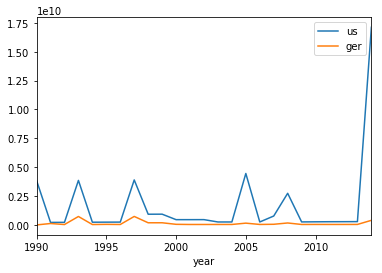

In [203]:
pd.DataFrame({'us': us, 'ger': ger}).plot()

In [204]:
ger_c = energy_pivot.loc['Germany'].sum(axis=1)
us_c = energy_pivot.loc['United States'].sum(axis=1)

In [205]:
us_ger = pd.DataFrame({'us_c': us_c, 'ger_c': ger_c}).head(100)

In [206]:
us_ger_diff = us_ger['us_c'] - us_ger['ger_c']

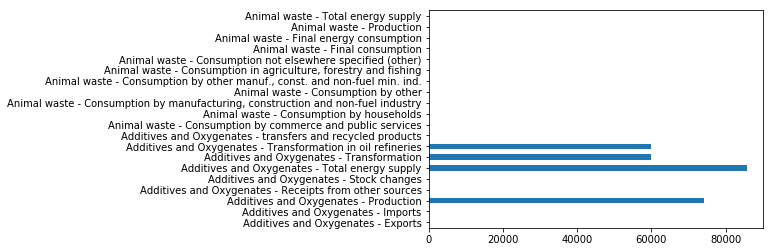

In [207]:
us_ger_diff.head(20).plot(kind='barh')

In [208]:
energy_pivot.loc['Germany'].to_excel('./data/germany.xls')

In [209]:
energy_pivot.loc['Germany'].mean(axis=1).head()

commodity_transaction
Additives and Oxygenates - Production                          1232.208333
Additives and Oxygenates - Total energy supply                 1232.208333
Additives and Oxygenates - Transformation                      1232.208333
Additives and Oxygenates - Transformation in oil refineries    1232.208333
Anthracite - Final consumption                                  673.416667
dtype: float64

Introduce new columns

In [210]:
inno["group"] = inno["Nummer"].apply(lambda x: x[0])

Group rows

In [211]:
inno.groupby("group").agg([np.sum, np.mean, np.std])

2006                      2007                      2008            \
        sum      mean       std   sum      mean       std   sum      mean   
group                                                                       
B       0.3  0.300000       NaN   0.5  0.500000       NaN   0.4  0.400000   
C      82.4  4.847059  6.100934  84.8  4.988235  6.734044  92.1  5.417647   
D       1.9  1.900000       NaN   2.5  2.500000       NaN   2.3  2.300000   
E       0.7  0.350000  0.353553   0.6  0.300000  0.141421   0.6  0.300000   
G       3.2  3.200000       NaN   2.9  2.900000       NaN   2.3  2.300000   
H       4.8  4.800000       NaN   5.2  5.200000       NaN   5.4  5.400000   
J      10.1  5.050000  5.444722  10.6  5.300000  5.656854  12.2  6.100000   
K       5.8  5.800000       NaN   6.8  6.800000       NaN   5.1  5.100000   
M       3.5  1.166667  1.069268   4.5  1.500000  1.743560   4.9  1.633333   
N       0.6  0.600000       NaN   0.8  0.800000       NaN   0.7  0.700000   

                 2009  ...       2016   2017                        2018  \
            std   sum  ...        std    sum      mean        std    sum   
group                  ...                                                 
B           NaN   0.2  ...        NaN    0.2  0.200000        NaN    0.2   
C      7.372859  80.8  ...  11.161264  126.3  7.429412  11.271965  129.7   
D           NaN   2.5  ...        NaN    2.9  2.900000        NaN    3.5   
E      0.282843   0.5  ...   0.070711    0.4  0.200000   0.141421    0.4   
G           NaN   2.7  ...        NaN    2.1  2.100000        NaN    2.4   
H           NaN   5.1  ...        NaN    6.0  6.000000        NaN    6.4   
J      6.081118  11.1  ...   6.858936   14.7  7.350000   7.848885   15.7   
K           NaN   4.0  ...        NaN    6.0  6.000000        NaN    6.1   
M      1.962991   4.4  ...   2.657693    7.1  2.366667   2.715388    6.5   
N           NaN   0.7  ...        NaN    1.3  1.300000        NaN    1.4   

                             2019                       
           mean        std    sum      mean        std  
group                                                   
B      0.200000        NaN    0.2  0.200000        NaN  
C      7.629412  11.733646  132.1  7.770588  12.034262  
D      3.500000        NaN    4.0  4.000000        NaN  
E      0.200000   0.141421    0.4  0.200000   0.000000  
G      2.400000        NaN    2.2  2.200000        NaN  
H      6.400000        NaN    7.0  7.000000        NaN  
J      7.850000   8.697413   16.3  8.150000   9.121677  
K      6.100000        NaN    5.8  5.800000        NaN  
M      2.166667   2.540341    6.6  2.200000   2.598076  
N      1.400000        NaN    1.4  1.400000        NaN  

[10 rows x 42 columns]

## Indexing

### Rows

You can specify an index like in Series and use it to access certain rows.

Use **df.loc[label]** to select rows by their name, or **df.iloc[row-number]** to access rows by their number (0,1,2,...)

In [212]:
df = pd.DataFrame({
    "prefix": ["DIN EN ISO", "DIN EN ISO", "DIN ISO/IEC"],
    "number": [14001, 9001, 27001],
    "keyword": ["environment", "quality", "IT-security"]
}, index=['a','b','c'])

In [213]:
df

,prefix,number,keyword
a,DIN EN ISO,14001,environment
b,DIN EN ISO,9001,quality
c,DIN ISO/IEC,27001,IT-security


In [214]:
df.loc['b']

prefix     DIN EN ISO
number           9001
keyword       quality
Name: b, dtype: object

In [215]:
inno = inno.set_index(inno["Nummer"].map(lambda n: n.strip()))

In [216]:
inno.loc["C 20"]

Nummer                                                      C 20
Wirtschaftsgliederung    Herstellung von chemischen Erzeugnissen
2006                                                           6
2007                                                           6
2008                                                         6.2
2009                                                         5.9
2010                                                         5.9
2011                                                         6.3
2012                                                         6.8
2013                                                         6.8
2014                                                         6.7
2015                                                         7.2
2016                                                         7.1
2017                                                           8
2018                                                         7.8
2019                     

You can also use a column as the index:

In [217]:
stds = df.set_index("number")
stds

,prefix,keyword
number,,
14001,DIN EN ISO,environment
9001,DIN EN ISO,quality
27001,DIN ISO/IEC,IT-security


In [218]:
stds.loc[14001]

prefix      DIN EN ISO
keyword    environment
Name: 14001, dtype: object

You can access multiple rows at once:

In [219]:
stds.loc[[14001, 9001]]

,prefix,keyword
number,,
14001,DIN EN ISO,environment
9001,DIN EN ISO,quality


In [220]:
inno.loc[["C 20", "C 21", "C 22", "C 23", "C 24", "C 25", "C 26"]]

,Nummer,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,group
Nummer,,,,,,,,,,,,,,,,,
C 20,C 20,Herstellung von chemischen Erzeugnissen,6.0,6.0,6.2,5.9,5.9,6.3,6.8,6.8,6.7,7.2,7.1,8.0,7.8,7.7,C
C 21,C 21,Herstellung von pharmazeutischen Erzeugnissen,5.7,5.8,6.5,6.2,6.1,6.8,7.4,8.2,8.5,8.8,9.1,11.0,11.8,12.3,C
C 22,C 22,Herstellung von Gummi- und Kunststoffwaren,1.8,1.8,1.9,1.6,1.8,2.1,2.1,2.0,2.3,2.3,2.5,2.9,2.8,2.6,C
C 23,C 23,"Herstellung von Glas und Glaswaren, Keramik, V...",1.0,1.2,1.3,0.9,1.1,1.1,1.2,1.0,1.4,1.0,0.9,1.4,1.4,1.4,C
C 24,C 24,Metallerzeugung und -bearbeitung,1.9,2.2,2.6,1.7,1.6,1.9,1.9,2.0,2.0,1.9,2.1,2.1,1.9,2.0,C
C 25,C 25,Herstellung von Metallerzeugnissen,3.6,3.6,3.5,2.5,3.0,2.9,2.9,3.6,2.7,2.4,3.1,3.2,3.0,3.2,C
C 26,C 26,"Herstellung von Datenverarbeitungsgeräten, ele...",9.8,8.8,9.5,8.1,8.5,10.2,9.4,10.0,10.9,12.1,11.7,12.5,12.7,12.4,C


In order to address rows by row-number, use *iloc*:

In [221]:
df.iloc[0]

prefix      DIN EN ISO
number           14001
keyword    environment
Name: a, dtype: object

In [222]:
stds.iloc[0]

prefix      DIN EN ISO
keyword    environment
Name: 14001, dtype: object

In [223]:
stds.iloc[[0,1]]

,prefix,keyword
number,,
14001,DIN EN ISO,environment
9001,DIN EN ISO,quality


You can slice:

In [224]:
# get all except first and last rows:
stds.iloc[1:-1]

,prefix,keyword
number,,
9001,DIN EN ISO,quality


### Columns

Select columns by their name or number:

In [225]:
stds

,prefix,keyword
number,,
14001,DIN EN ISO,environment
9001,DIN EN ISO,quality
27001,DIN ISO/IEC,IT-security


In [226]:
stds["prefix"]

number
14001     DIN EN ISO
9001      DIN EN ISO
27001    DIN ISO/IEC
Name: prefix, dtype: object

In [227]:
stds[["keyword","prefix"]]

,keyword,prefix
number,,
14001,environment,DIN EN ISO
9001,quality,DIN EN ISO
27001,IT-security,DIN ISO/IEC


Each column is a Series:

In [228]:
stds["prefix"].map(lambda p: True if "EN" in p else False)

number
14001     True
9001      True
27001    False
Name: prefix, dtype: bool

Assign new columns:

In [229]:
stds["EN"] = stds["prefix"].map(lambda p: True if "EN" in p else False)
stds["IEC"] = stds["prefix"].map(lambda p: True if "IEC" in p else False)
stds

,prefix,keyword,EN,IEC
number,,,,
14001,DIN EN ISO,environment,True,False
9001,DIN EN ISO,quality,True,False
27001,DIN ISO/IEC,IT-security,False,True


Select columns by column-number using **iloc**:

In [230]:
# iloc[ <row-numbers> , <column-numbers> ]
# : => all rows/columns

stds.iloc[:, [1, 3]]

,keyword,IEC
number,,
14001,environment,False
9001,quality,False
27001,IT-security,True


In [231]:
stds.loc[[9001, 27001],["keyword", "IEC"]]

,keyword,IEC
number,,
9001,quality,False
27001,IT-security,True


## Aggregation

In [232]:
inno.set_index("Nummer", inplace=True)

In [233]:
inno

,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,group
Nummer,,,,,,,,,,,,,,,,
B 05-09,Bergbau und Gewinnung von Steinen und Erden,0.3,0.5,0.4,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.2,B
C 10-12,Herstellung von Nahrungs- und Futtermitteln so...,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3,C
C 13-15,"Textil-, Bekleidungs- und Ledergewerbe",0.6,0.8,0.8,0.5,0.7,0.7,0.9,0.9,0.7,0.9,0.9,1.0,1.0,1.0,C
C 16-18,"Holz- (ohne Herstellung von Möbeln), Papier- u...",2.0,2.1,1.7,1.2,1.4,1.3,1.4,1.3,1.4,1.6,1.5,1.2,1.5,1.3,C
C 19,Kokerei und Mineralölverarbeitung,0.5,0.3,0.3,0.3,0.3,0.3,0.4,0.3,0.4,0.5,0.5,0.3,0.3,0.3,C
C 20,Herstellung von chemischen Erzeugnissen,6.0,6.0,6.2,5.9,5.9,6.3,6.8,6.8,6.7,7.2,7.1,8.0,7.8,7.7,C
C 21,Herstellung von pharmazeutischen Erzeugnissen,5.7,5.8,6.5,6.2,6.1,6.8,7.4,8.2,8.5,8.8,9.1,11.0,11.8,12.3,C
C 22,Herstellung von Gummi- und Kunststoffwaren,1.8,1.8,1.9,1.6,1.8,2.1,2.1,2.0,2.3,2.3,2.5,2.9,2.8,2.6,C
C 23,"Herstellung von Glas und Glaswaren, Keramik, V...",1.0,1.2,1.3,0.9,1.1,1.1,1.2,1.0,1.4,1.0,0.9,1.4,1.4,1.4,C


In [234]:
inno_num = inno.T.drop(["Wirtschaftsgliederung"])

In [235]:
inno_num

Nummer,B 05-09,C 10-12,C 13-15,C 16-18,C 19,C 20,C 21,C 22,C 23,C 24,...,E 38-39,G 46,H 49-53,J 58-60,J 61-63,K 64-66,M 69/70.2,M 71-72,M 73-74,N 78-82
2006,0.3,2.5,0.6,2,0.5,6,5.7,1.8,1,1.9,...,0.6,3.2,4.8,1.2,8.9,5.8,0.5,2.4,0.6,0.6
2007,0.5,2.7,0.8,2.1,0.3,6,5.8,1.8,1.2,2.2,...,0.4,2.9,5.2,1.3,9.3,6.8,0.7,3.5,0.3,0.8
2008,0.4,2.5,0.8,1.7,0.3,6.2,6.5,1.9,1.3,2.6,...,0.5,2.3,5.4,1.8,10.4,5.1,0.5,3.9,0.5,0.7
2009,0.2,2.7,0.5,1.2,0.3,5.9,6.2,1.6,0.9,1.7,...,0.2,2.7,5.1,1.7,9.4,4,0.7,3.2,0.5,0.7
2010,0.3,2.1,0.7,1.4,0.3,5.9,6.1,1.8,1.1,1.6,...,0.2,2.1,5.9,1.5,10.5,5,0.7,3.8,0.4,0.8
2011,0.3,2.7,0.7,1.3,0.3,6.3,6.8,2.1,1.1,1.9,...,0.2,1.8,6,1.2,10,4.7,0.6,3.9,0.3,0.8
2012,0.3,2.6,0.9,1.4,0.4,6.8,7.4,2.1,1.2,1.9,...,0.3,2,5.7,1.2,10.1,5.2,0.6,3.3,0.3,0.7
2013,0.2,3.1,0.9,1.3,0.3,6.8,8.2,2,1,2,...,0.3,2.2,5.8,1.4,11.6,4.4,0.8,3.6,0.6,0.9
2014,0.3,2.7,0.7,1.4,0.4,6.7,8.5,2.3,1.4,2,...,0.3,1.9,4.8,1.5,10.7,5.5,0.6,3.8,0.3,1
2015,0.3,2.5,0.9,1.6,0.5,7.2,8.8,2.3,1,1.9,...,0.4,2.1,5.8,1.5,11.6,5.2,0.6,5,0.6,1.1


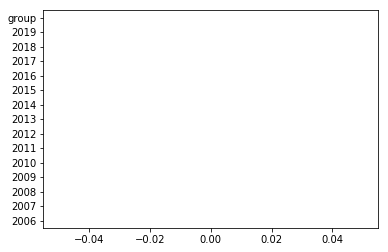

In [236]:
inno_num.mean(axis=1).plot(kind='barh')

In [237]:
inno.T.head()

Nummer,B 05-09,C 10-12,C 13-15,C 16-18,C 19,C 20,C 21,C 22,C 23,C 24,...,E 38-39,G 46,H 49-53,J 58-60,J 61-63,K 64-66,M 69/70.2,M 71-72,M 73-74,N 78-82
Wirtschaftsgliederung,Bergbau und Gewinnung von Steinen und Erden,Herstellung von Nahrungs- und Futtermitteln so...,"Textil-, Bekleidungs- und Ledergewerbe","Holz- (ohne Herstellung von Möbeln), Papier- u...",Kokerei und Mineralölverarbeitung,Herstellung von chemischen Erzeugnissen,Herstellung von pharmazeutischen Erzeugnissen,Herstellung von Gummi- und Kunststoffwaren,"Herstellung von Glas und Glaswaren, Keramik, V...",Metallerzeugung und -bearbeitung,...,"Entsorgung, Recycling; Beseitigung von Umweltv...",Großhandel (ohne Handel mit Kraftfahrzeugen),Verkehr und Lagerei,"Verlagswesen; Film-, Fernseh- und Musikwesen; ...",Telekommunikation; Erbringung von \nDienstleis...,Erbringung von Finanz- und \nVersicherungsdien...,"Rechts- und Steuerberatung, Wirtschaftsprüfung...","Architektur- und Ingenieurbüros; technische, p...",Werbung und Marktforschung; sonstige \nfreiber...,Unternehmensdienste
2006,0.3,2.5,0.6,2,0.5,6,5.7,1.8,1,1.9,...,0.6,3.2,4.8,1.2,8.9,5.8,0.5,2.4,0.6,0.6
2007,0.5,2.7,0.8,2.1,0.3,6,5.8,1.8,1.2,2.2,...,0.4,2.9,5.2,1.3,9.3,6.8,0.7,3.5,0.3,0.8
2008,0.4,2.5,0.8,1.7,0.3,6.2,6.5,1.9,1.3,2.6,...,0.5,2.3,5.4,1.8,10.4,5.1,0.5,3.9,0.5,0.7
2009,0.2,2.7,0.5,1.2,0.3,5.9,6.2,1.6,0.9,1.7,...,0.2,2.7,5.1,1.7,9.4,4,0.7,3.2,0.5,0.7


In [238]:
inno_num.sum().head()

Series([], dtype: float64)

In [239]:
inno_num.sum(axis=1).head()

2006    113.3
2007    119.2
2008      126
2009      112
2010    119.3
dtype: object

In [240]:
inno_num.aggregate(np.sum).head()

Series([], dtype: float64)

In [241]:
inno_num.mean().head()

Series([], dtype: float64)

In [242]:
inno_num.aggregate([np.max, np.mean, np.std], axis=0)

ValueError: no results

In [ ]:
stats_per_sector = inno_num.aggregate([np.max, np.mean, np.std], axis=0).T
sorted_stats_per_sector = stats_per_sector.sort_values(by='mean')
top5 = sorted_stats_per_sector.head()
top5.plot(kind='barh')

In [ ]:
inno_num.aggregate([np.sum, np.mean, np.std]).iloc[:,:5]

In [ ]:
inno_num.aggregate([np.sum, np.mean, np.std], axis=1).head()

In [ ]:
inno_num.aggregate(lambda x: x**2 + x).head()

In [ ]:
inno_num.head()

In [ ]:
# change in expenditures from 2006 to 2019

inno_num.apply(lambda col: (col[-1] - col.iloc[:3].mean())).plot(kind='barh')

In [ ]:
[c for c in inno.index if c[0]=="D"]

In [ ]:
inno.set_index("Nummer")

In [113]:
inno

,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nummer,,,,,,,,,,,,,,,
B 05-09,Bergbau und Gewinnung von Steinen und Erden,0.3,0.5,0.4,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.2
C 10-12,Herstellung von Nahrungs- und Futtermitteln so...,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3
C 13-15,"Textil-, Bekleidungs- und Ledergewerbe",0.6,0.8,0.8,0.5,0.7,0.7,0.9,0.9,0.7,0.9,0.9,1.0,1.0,1.0
C 16-18,"Holz- (ohne Herstellung von Möbeln), Papier- u...",2.0,2.1,1.7,1.2,1.4,1.3,1.4,1.3,1.4,1.6,1.5,1.2,1.5,1.3
C 19,Kokerei und Mineralölverarbeitung,0.5,0.3,0.3,0.3,0.3,0.3,0.4,0.3,0.4,0.5,0.5,0.3,0.3,0.3
C 20,Herstellung von chemischen Erzeugnissen,6.0,6.0,6.2,5.9,5.9,6.3,6.8,6.8,6.7,7.2,7.1,8.0,7.8,7.7
C 21,Herstellung von pharmazeutischen Erzeugnissen,5.7,5.8,6.5,6.2,6.1,6.8,7.4,8.2,8.5,8.8,9.1,11.0,11.8,12.3
C 22,Herstellung von Gummi- und Kunststoffwaren,1.8,1.8,1.9,1.6,1.8,2.1,2.1,2.0,2.3,2.3,2.5,2.9,2.8,2.6
C 23,"Herstellung von Glas und Glaswaren, Keramik, V...",1.0,1.2,1.3,0.9,1.1,1.1,1.2,1.0,1.4,1.0,0.9,1.4,1.4,1.4


In [109]:
inno.loc[
    [c for c in inno.index if c[0]=="C"],  # valid rows
    "2019"                                 # valid columns
]

Nummer
C 10-12      3.3
C 13-15      1.0
C 16-18      1.3
C 19         0.3
C 20         7.7
C 21        12.3
C 22         2.6
C 23         1.4
C 24         2.0
C 25         3.2
C 26        12.4
C 27         9.7
C 28        16.0
C 29        50.6
C 30         5.2
C 31-32      2.0
C 33         1.1
Name: 2019, dtype: float64

In [135]:
inno.loc[
    :, 
    ["2006","2008","2010","2012","2014","2016","2018"] # valid columns
].mean().mean()

4.63047619047619

In [134]:
inno.loc[:,inno.columns[1::]].mean().mean()

4.71047619047619

In [128]:
inno.columns

Index(['Wirtschaftsgliederung', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [129]:
inno.columns[1::2]

Index(['2006', '2008', '2010', '2012', '2014', '2016', '2018'], dtype='object')

In [141]:
inno.head()

,Wirtschaftsgliederung,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nummer,,,,,,,,,,,,,,,
B 05-09,Bergbau und Gewinnung von Steinen und Erden,0.3,0.5,0.4,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.2
C 10-12,Herstellung von Nahrungs- und Futtermitteln so...,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3
C 13-15,"Textil-, Bekleidungs- und Ledergewerbe",0.6,0.8,0.8,0.5,0.7,0.7,0.9,0.9,0.7,0.9,0.9,1.0,1.0,1.0
C 16-18,"Holz- (ohne Herstellung von Möbeln), Papier- u...",2.0,2.1,1.7,1.2,1.4,1.3,1.4,1.3,1.4,1.6,1.5,1.2,1.5,1.3
C 19,Kokerei und Mineralölverarbeitung,0.5,0.3,0.3,0.3,0.3,0.3,0.4,0.3,0.4,0.5,0.5,0.3,0.3,0.3


In [142]:
inno.apply(lambda sector: sector['2019'] - sector['2006'], axis=1).mean()

2.0900000000000003

## Grouping

In [291]:
dfg = pd.DataFrame({
    'gender': ['M', 'F', 'F', 'M', 'M'],
    'age': [60, 30, 10, 7, 3],
    'height': [1.8, 1.6, 1.5, 1.45, .73]
})

In [292]:
dfg

,gender,age,height
0,M,60,1.80
1,F,30,1.60
2,F,10,1.50
3,M,7,1.45
4,M,3,0.73


In [293]:
dfg.groupby(by="gender")

In [295]:
for gender, group in dfg.groupby(by="gender"):
    print("group=" + gender)
    print(group)

group=F
  gender  age  height
1      F   30     1.6
2      F   10     1.5
group=M
  gender  age  height
0      M   60    1.80
3      M    7    1.45
4      M    3    0.73


In [300]:
dfg.groupby(by="gender").aggregate([np.mean, np.std])

age               height          
             mean        std      mean       std
gender                                          
F       20.000000  14.142136  1.550000  0.070711
M       23.333333  31.817186  1.326667  0.545558

In [308]:
(inno_num.T
 .groupby(by=lambda index: index[0])
 .apply(np.mean))

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
B,0.300000,0.500000,0.400000,0.200000,0.300000,0.300000,0.300000,0.200000,0.300000,0.300000,0.200000,0.200000,0.200000,0.200000
C,4.847059,4.988235,5.417647,4.752941,5.023529,5.747059,6.135294,6.411765,6.452941,6.864706,7.058824,7.429412,7.629412,7.770588
D,1.900000,2.500000,2.300000,2.500000,2.400000,3.100000,3.200000,4.300000,4.200000,4.600000,3.600000,2.900000,3.500000,4.000000
E,0.350000,0.300000,0.300000,0.250000,0.250000,0.200000,0.200000,0.250000,0.250000,0.300000,0.250000,0.200000,0.200000,0.200000
G,3.200000,2.900000,2.300000,2.700000,2.100000,1.800000,2.000000,2.200000,1.900000,2.100000,2.600000,2.100000,2.400000,2.200000
H,4.800000,5.200000,5.400000,5.100000,5.900000,6.000000,5.700000,5.800000,4.800000,5.800000,6.500000,6.000000,6.400000,7.000000
J,5.050000,5.300000,6.100000,5.550000,6.000000,5.600000,5.650000,6.500000,6.100000,6.550000,6.350000,7.350000,7.850000,8.150000
K,5.800000,6.800000,5.100000,4.000000,5.000000,4.700000,5.200000,4.400000,5.500000,5.200000,5.500000,6.000000,6.100000,5.800000
M,1.166667,1.500000,1.633333,1.466667,1.633333,1.600000,1.400000,1.666667,1.566667,2.066667,2.133333,2.366667,2.166667,2.200000
N,0.600000,0.800000,0.700000,0.700000,0.800000,0.800000,0.700000,0.900000,1.000000,1.100000,1.400000,1.300000,1.400000,1.400000


## Selection

In [349]:
di = inno_num.T

In [350]:
di.head(3)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nummer,,,,,,,,,,,,,,
B 05-09,0.3,0.5,0.4,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.2
C 10-12,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3
C 13-15,0.6,0.8,0.8,0.5,0.7,0.7,0.9,0.9,0.7,0.9,0.9,1,1,1


Filter a DataFrame with boolean selections:

In [351]:
selection = di['2019'] > 10
selection

Nummer
B 05-09      False
C 10-12      False
C 13-15      False
C 16-18      False
C 19         False
C 20         False
C 21          True
C 22         False
C 23         False
C 24         False
C 25         False
C 26          True
C 27         False
C 28          True
C 29          True
C 30         False
C 31-32      False
C 33         False
D 35         False
E 36-37      False
E 38-39      False
G 46         False
H 49-53      False
J 58-60      False
J 61-63       True
K 64-66      False
M 69/70.2    False
M 71-72      False
M 73-74      False
N 78-82      False
Name: 2019, dtype: bool

In [352]:
di[selection]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nummer,,,,,,,,,,,,,,
C 21,5.7,5.8,6.5,6.2,6.1,6.8,7.4,8.2,8.5,8.8,9.1,11,11.8,12.3
C 26,9.8,8.8,9.5,8.1,8.5,10.2,9.4,10,10.9,12.1,11.7,12.5,12.7,12.4
C 28,11.2,12.1,13.7,11.5,11.7,12.7,13.3,13.4,13.6,14.3,15.4,15.4,15.8,16
C 29,25.1,28.1,30.6,26.6,29.8,34.8,39.3,41.9,41.6,45.9,47,47.4,49.3,50.6
J 61-63,8.9,9.3,10.4,9.4,10.5,10,10.1,11.6,10.7,11.6,11.2,12.9,14,14.6


Combine selections with ```&``` (and), ```|``` (or), ```~``` (not)

In [353]:
di[(di['2019']>10) | (di['2006']>5)]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nummer,,,,,,,,,,,,,,
C 20,6,6,6.2,5.9,5.9,6.3,6.8,6.8,6.7,7.2,7.1,8,7.8,7.7
C 21,5.7,5.8,6.5,6.2,6.1,6.8,7.4,8.2,8.5,8.8,9.1,11,11.8,12.3
C 26,9.8,8.8,9.5,8.1,8.5,10.2,9.4,10,10.9,12.1,11.7,12.5,12.7,12.4
C 27,5.6,4.6,4.8,5.1,4.9,6.9,6.8,6.9,6.5,7.4,7.9,8.9,9.2,9.7
C 28,11.2,12.1,13.7,11.5,11.7,12.7,13.3,13.4,13.6,14.3,15.4,15.4,15.8,16
C 29,25.1,28.1,30.6,26.6,29.8,34.8,39.3,41.9,41.6,45.9,47,47.4,49.3,50.6
J 61-63,8.9,9.3,10.4,9.4,10.5,10,10.1,11.6,10.7,11.6,11.2,12.9,14,14.6
K 64-66,5.8,6.8,5.1,4,5,4.7,5.2,4.4,5.5,5.2,5.5,6,6.1,5.8


In [354]:
di[(di['2019']>10) & ~(di['2006']>10)]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nummer,,,,,,,,,,,,,,
C 21,5.7,5.8,6.5,6.2,6.1,6.8,7.4,8.2,8.5,8.8,9.1,11,11.8,12.3
C 26,9.8,8.8,9.5,8.1,8.5,10.2,9.4,10,10.9,12.1,11.7,12.5,12.7,12.4
J 61-63,8.9,9.3,10.4,9.4,10.5,10,10.1,11.6,10.7,11.6,11.2,12.9,14,14.6


There's the ```query``` method that lets you specify more complex selection easily

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

In [369]:
di2 = di.rename(columns={y:'y'+y for y in di.columns})
di2.head(3)

,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
Nummer,,,,,,,,,,,,,,
B 05-09,0.3,0.5,0.4,0.2,0.3,0.3,0.3,0.2,0.3,0.3,0.2,0.2,0.2,0.2
C 10-12,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3
C 13-15,0.6,0.8,0.8,0.5,0.7,0.7,0.9,0.9,0.7,0.9,0.9,1,1,1


In [377]:
di2.query("y2009 > y2008 and y2019 > 1")

,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
Nummer,,,,,,,,,,,,,,
C 10-12,2.5,2.7,2.5,2.7,2.1,2.7,2.6,3.1,2.7,2.5,2.2,3.3,3.3,3.3
C 27,5.6,4.6,4.8,5.1,4.9,6.9,6.8,6.9,6.5,7.4,7.9,8.9,9.2,9.7
C 33,0.6,0.5,0.8,0.9,1.1,1.1,1.3,1.2,1.2,1,1,0.9,1,1.1
D 35,1.9,2.5,2.3,2.5,2.4,3.1,3.2,4.3,4.2,4.6,3.6,2.9,3.5,4
G 46,3.2,2.9,2.3,2.7,2.1,1.8,2,2.2,1.9,2.1,2.6,2.1,2.4,2.2


## Plotting

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

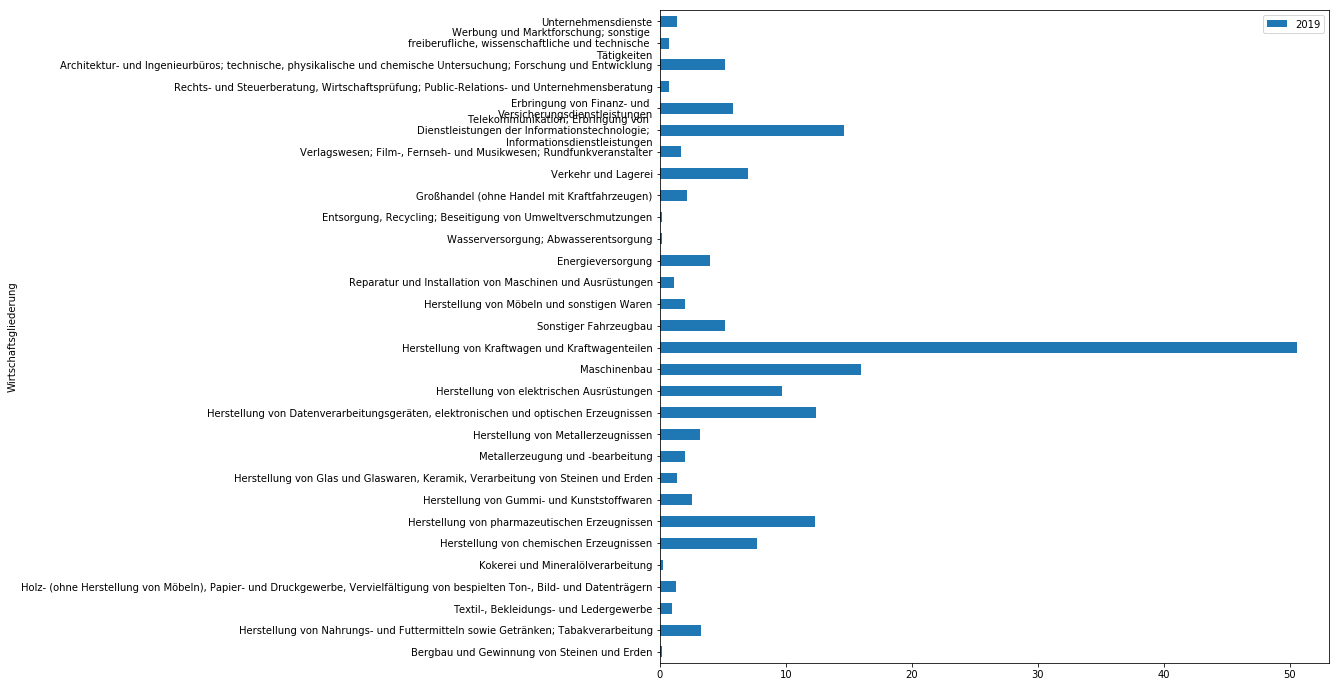

In [57]:
inno.plot.barh(x="Wirtschaftsgliederung", y="2019", figsize=(12,12))

In many cases, you can pass multiple columns to plot at once...

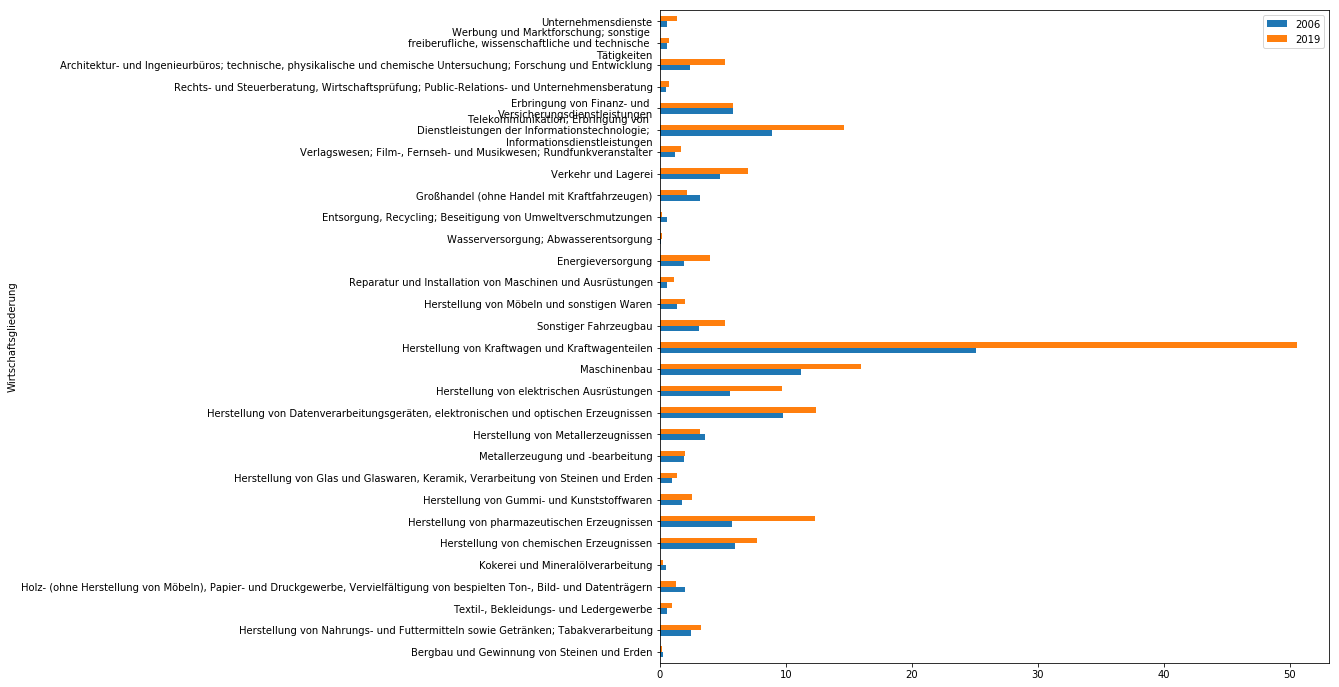

In [61]:
inno.plot.barh(x="Wirtschaftsgliederung", y=["2006","2019"], figsize=(12,12))

Use **sort_values(by=column name)** to return a sorted version of the DataFrame

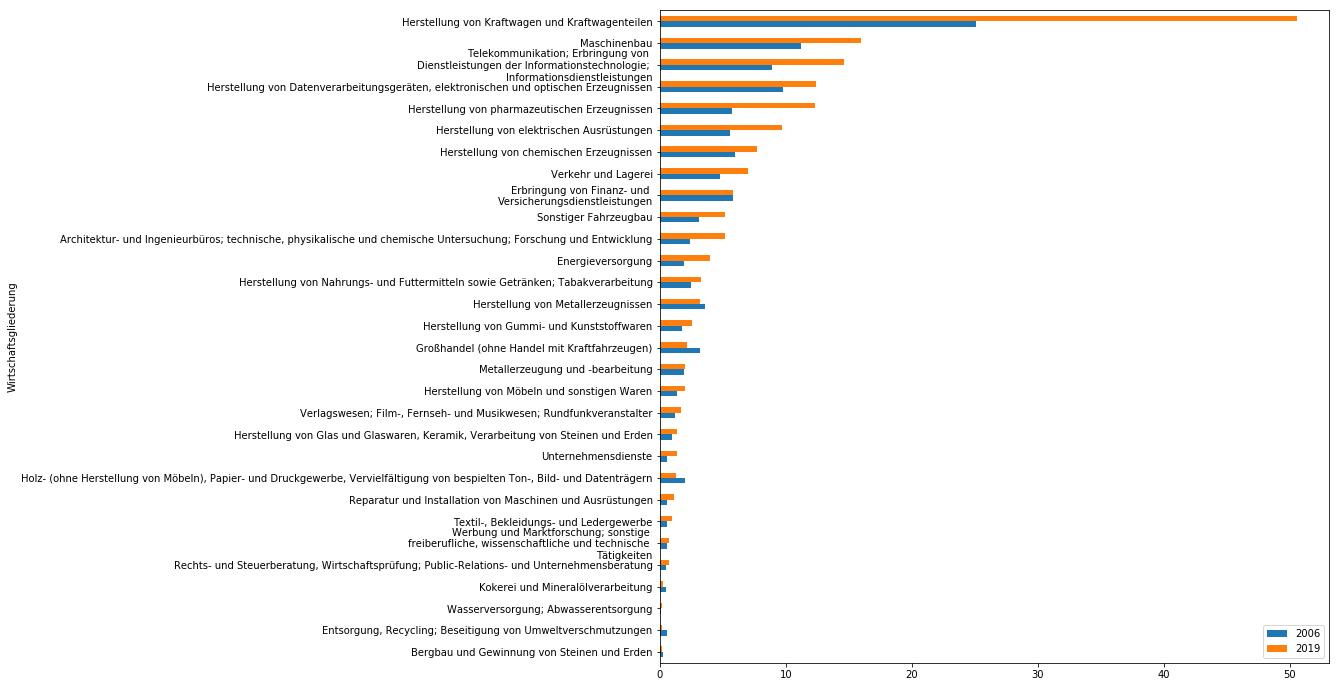

In [62]:
inno.sort_values(by='2019',ascending=True).plot.barh(x="Wirtschaftsgliederung", y=["2006","2019"], figsize=(12,12))

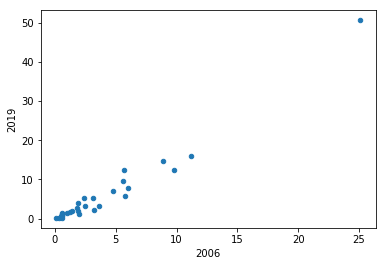

In [250]:
inno.plot.scatter(x="2006", y="2019")

Transpose (**.T**) the output of describe() to plot aggregated values

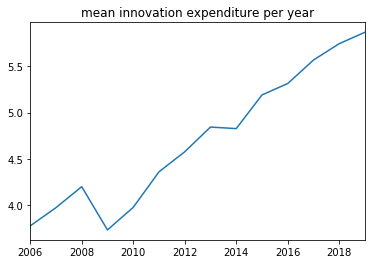

In [95]:
# DataFrame.T transposes the table, so that rows become columns...

inno.describe().T["mean"].plot(title="mean innovation expenditure per year")

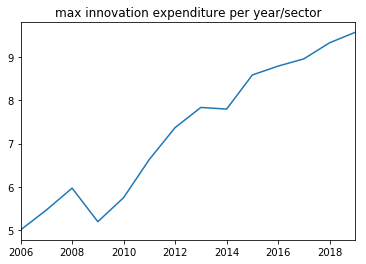

In [97]:
inno.describe().T["std"].plot(title="max innovation expenditure per year/sector")

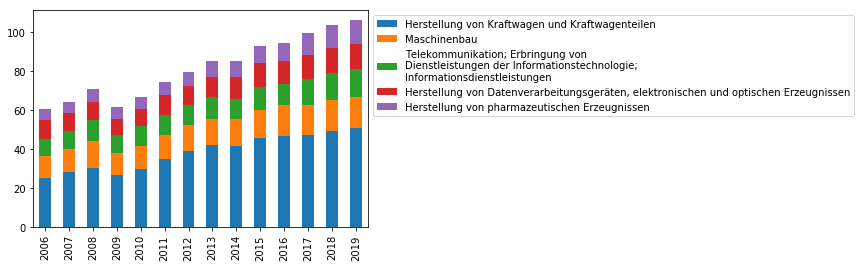

In [94]:
(
inno
    # select top5 of 2019
    .sort_values(by='2019',ascending=False)[:5]
    
    # index sectors by their name
    .set_index("Wirtschaftsgliederung")
    
    # transpose so that years are rows, drop the "Nummer" row
    .T.drop("Nummer")
    
    # plot a stacked bar chart
    .plot.bar(stacked=True, title="TOP5 expenditure")
    
    # to make things nicer, put the legend outside the chart (long sector names...)
    .legend(bbox_to_anchor=(1,1))
)

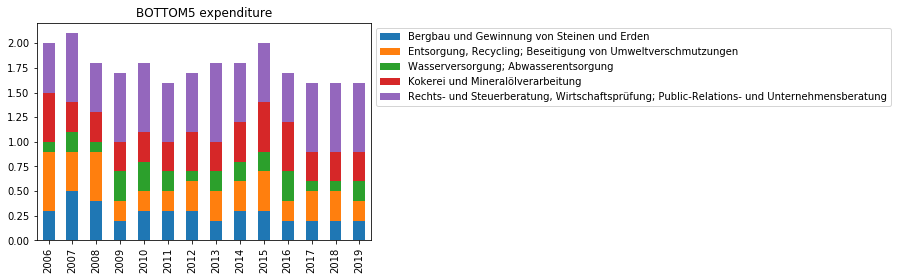

In [98]:
(
inno
    # select top5 of 2019
    .sort_values(by='2019',ascending=True)[:5]
    
    # index sectors by their name
    .set_index("Wirtschaftsgliederung")
    
    # transpose so that years are rows, drop the "Nummer" row
    .T.drop("Nummer")
    
    # plot a stacked bar chart
    .plot.bar(stacked=True, title="BOTTOM5 expenditure")
    
    # to make things nicer, put the legend outside the chart (long sector names...)
    .legend(bbox_to_anchor=(1,1))
)

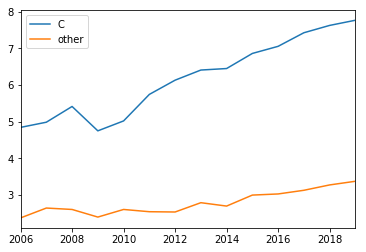

In [288]:
# plot mean expenditures of "C.." vs all others

inno_num.T.groupby(by=lambda c: "C" if c[0]=="C" else "other").apply(np.mean).T.plot()

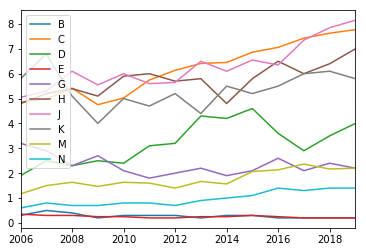

In [289]:
# plot mean expenditures of each group

inno_num.T.groupby(by=lambda c: c[0]).apply(np.mean).T.plot()